In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import networkx as nx


In [6]:
n_nodes = 10
C = ["red", "green"]  # Color set
T = 50  # Number of time steps
W = np.zeros((n_nodes, n_nodes))  # Adjacency matrix for line graph
for i in range(n_nodes - 1):
    W[i, i + 1] = 1
    W[i + 1, i] = 1

W

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [7]:
states = ["red"] * n_nodes
states

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [8]:
def draw_colored_graph_straight_line(states, adjacency_matrix, title="",file= None):
    """
    Draw a graph with nodes placed in a straight line and colored based on their states.
    
    Parameters:
        states (list): A list of states (colors) for each node.
        adjacency_matrix (ndarray): The adjacency matrix of the graph.
    """
    # Create the graph
    G = nx.Graph()
    n_nodes = len(states)
    
    # Add nodes with their states as attributes
    for i in range(n_nodes):
        G.add_node(i, color=states[i])
    
    # Add edges based on the adjacency matrix
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if adjacency_matrix[i, j] > 0:
                G.add_edge(i, j)
    
    # Extract node colors
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    
    # Define positions for nodes in a straight line
    pos = {i: (i, 0) for i in range(n_nodes)}
    
    # Draw the graph
    plt.figure(figsize=(8,2))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
    plt.title(title)
    if file != None:
        plt.savefig(title+'.jpg')
    plt.show()


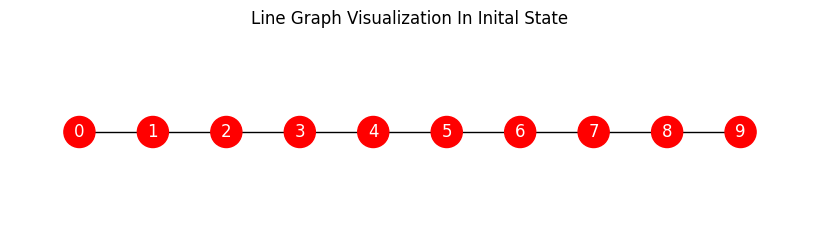

In [9]:
title= "Line Graph Visualization In Inital State"
draw_colored_graph_straight_line(states, W, title=title, file=1)

In [10]:
def cost(s, neighbor_state):
    return 1 if s == neighbor_state else 0

In [11]:
def noise(t):
    return t / 50

In [12]:
def update_probabilities(node, states, t):
    probs = []
    for color in C:
        total_cost = sum(W[node, j] * cost(color, states[j]) for j in range(n_nodes))
        probs.append(np.exp(-noise(t) * total_cost))
    probs = np.array(probs) / sum(probs)  # Normalize
    return probs

In [13]:
def compute_potential(states):
    U = 0
    for i in range(n_nodes):
        for j in range(n_nodes):
            if W[i, j] > 0:
                U += cost(states[i], states[j])
    return U / 2  # Avoid double-counting


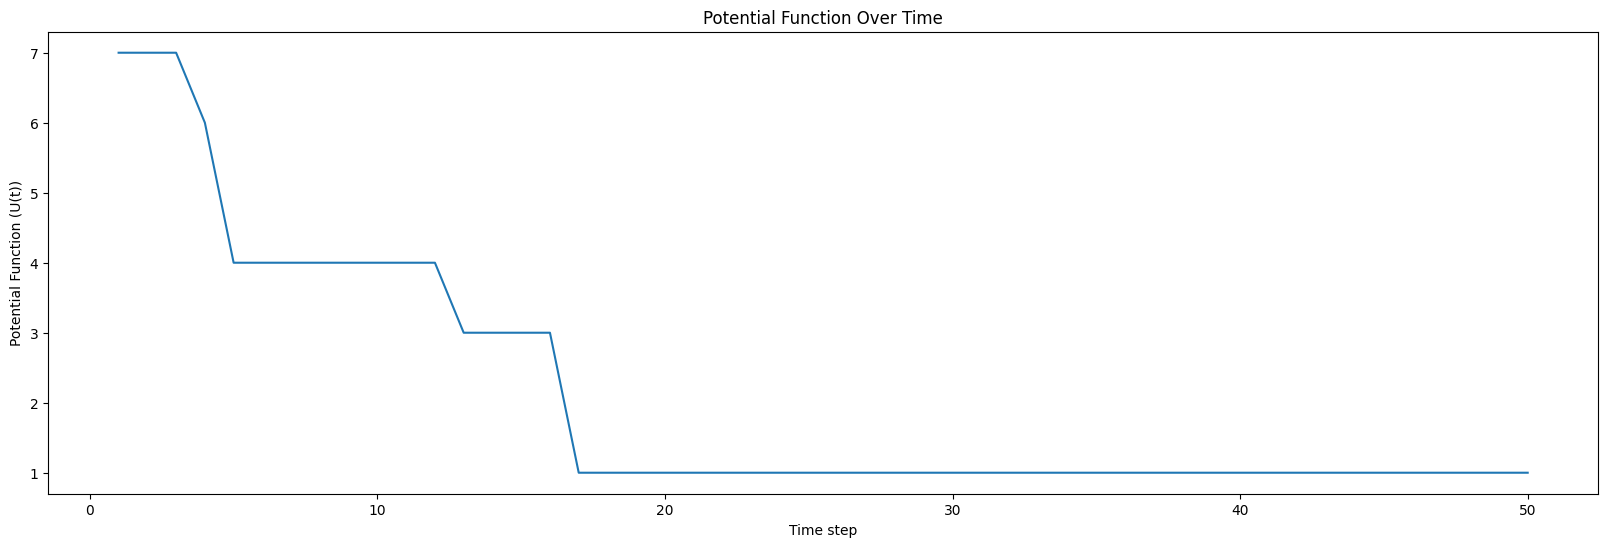

In [14]:

# Simulation
potential = []
for t in range(1, T + 1):
    node = np.random.randint(n_nodes)  # Random node
    
    probs = update_probabilities(node, states, t)
    
    
    index = np.argmax(probs)
    new_color = C[index]
    
    # new_color = np.random.choice(C, p=probs)  # Sample new color
    old_color = states[node]
    states[node] = new_color
    # print(states,f"node {node} \nprobability to red: {probs[0]} - probability to green: {probs[1]} \nold color: {old_color}  new color: {new_color}", "___________________________________",sep="\n")
    potential.append(compute_potential(states))

# Plot potential function
plt.figure(figsize=(20, 6))
plt.plot(range(1, T + 1), potential)
plt.xlabel("Time step")
plt.ylabel("Potential Function (U(t))")
plt.title("Potential Function Over Time")
plt.savefig("2_a_Potential Function Over Time.jpg")
plt.show()


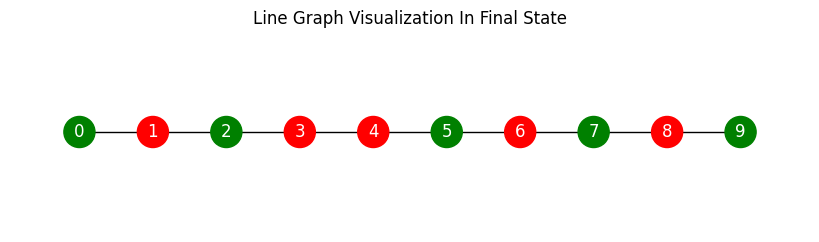

In [17]:
title= "Line Graph Visualization In Final State"
draw_colored_graph_straight_line(states, W, title=title,file=1)